# Part 3

# Task 1

See `.py` files.

# Task 2



In [25]:
from argparse import Namespace
from my_gan import main

config = Namespace(
    n_epochs=200,
    batch_size=64,
    lr=0.0002,
    latent_dim=100,
    save_interval=100
)

# main(config)  # Have already trained.

At the start of training,
![](images/0.png)

Halfway through training,
![](images/100.png)

After training has terminated,
![](images/199.png)

## Task 3

In [26]:
import torch
from my_gan import Generator
from torch import Tensor
latent_dim = config.latent_dim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
generator = Generator(latent_dim)
generator = generator.to(device)
generator.load_state_dict(torch.load('mnist_generator.pt', weights_only=True))

<All keys matched successfully>

In [33]:
z1 = torch.randn(latent_dim, device=device)
z2 = torch.randn(latent_dim, device=device)
step = 7
alphas = torch.linspace(0, 1, step + 2)
interpolated_z = torch.stack([(1 - alpha) * z1 + alpha * z2 for alpha in alphas])
generated_images = generator(Tensor(interpolated_z)).detach().cpu()

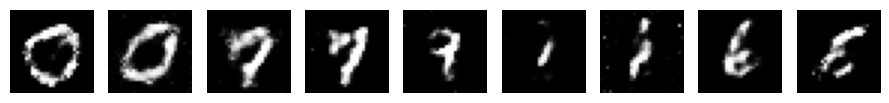

In [34]:
import matplotlib.pyplot as plt
generated_images = generated_images.numpy().reshape(step + 2, 28, 28)
fig, axes = plt.subplots(1, step + 2, figsize=(9, 9))

for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i], cmap='gray')  # 使用灰度色图
    ax.axis('off')  # 关闭坐标轴显示

plt.tight_layout()
plt.show()